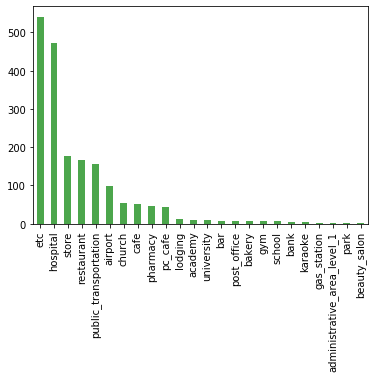

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings("ignore")

# 20대가 주로 다는 장소 
     
time_age = pd.read_csv(r'./data/PatientInfo.csv')
patient_route = pd.read_csv(r'./data/PatientRoute.csv')

patient_place = time_age.merge(patient_route, left_on = 'patient_id', right_on = 'patient_id', how = 'inner')
# print(joined_df)
patient_place = patient_place[patient_place.age.notnull()]
joined_df = patient_place[patient_place.age=='20s']

value = joined_df.type.value_counts()   
value = value.sort_values(ascending=False)
value.plot.bar(color='green', alpha = 0.7)

plt.show()

False    1098
True      800
Name: is_many, dtype: int64

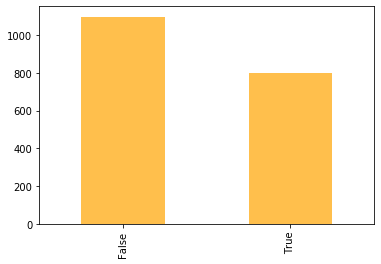

In [160]:
# 20대가 주로 다니는 장소 중 여러 사람이 이용하는 다중 이용시설의 비율을 알아본다.
many_people_place = ['hospital','public_transportation', 'airport', 'church', 'university','school','park']
len(many_people_place)

def ismany(x):
    if x in many_people_place:
        res = True
    else : 
        res = False
    return res

joined_df['is_many'] = joined_df['type'].apply(lambda x: ismany(x))
joined_df = joined_df[['patient_id', 'type', 'is_many']]

joined_df.is_many.value_counts().plot.bar(color='orange', alpha = 0.7)

joined_df.is_many.value_counts()
# etc가 500임을 감안하여 이는 정확하지 않다. 그러므로 더 이상의 분석을 하지 않는다.
# 다중 이용 시설을 많이 사용하는지 아닌지 확실 하지 않기 때문이다.

### 밥을 먹을 때 마스크를 벗고 먹는다. 
### 혹시 실내에서 마스크를 벗는 곳을 다른 집단보다 많이 가지 않았을까??

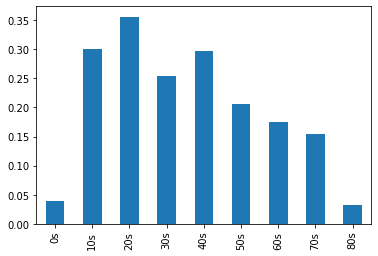

In [167]:
# # 20대가 주로 다니는 장소 중 여러 사람이 이용하는 다중 이용시설의 비율을 알아본다.
no_mask_place = ['restaurant','cafe','bar', 'bakery', 'karaoke','lodging','gym','church', 'pc_cafe']

def ismask(x):
    if x in no_mask_place:
        res = False
    else : 
        res = True
    return res

no_mask_rate = pd.Series()                                             

patient_place['is_mask'] = patient_place['type'].apply(lambda x: ismask(x))
patient_place = patient_place[['patient_id', 'age','type', 'is_mask']]

etc_delete = patient_place['type'].isin(['etc']) 
patient_place = patient_place[~etc_delete]

ismask_per_age = patient_place.groupby(['age']).is_mask.value_counts()

for i in range(9):
    wear_mask = ismask_per_age[i*2]
    unwear_mask = ismask_per_age[i*2+1]
    no_mask_rate[f'{i*10}s'] = np.divide(unwear_mask,wear_mask).round(5)

no_mask_rate.plot.bar()

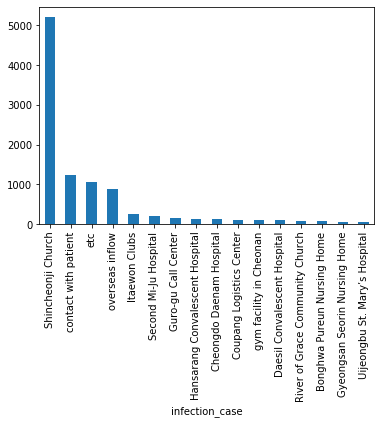

In [162]:
# 20대가 주요한 집단 감염에 많이 연루되어서 감염자가 많은가?
# 주요한 집단 감염을 50명 이상의 사람이 감염된 사건이라 하자.

case = pd.read_csv(r'./data/Case.csv')
all_case = case.groupby(['infection_case'])['confirmed'].sum()
all_case.sort_values(ascending = False, inplace=True)
all_case = all_case[all_case > 50]
all_case.plot.bar()
plt.show()

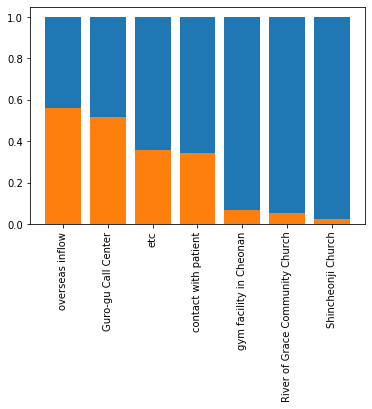

In [163]:
big_case_20 = time_age.merge(patient_route, left_on = 'patient_id', right_on = 'patient_id', how = 'inner')
big_case_20 = big_case_20[big_case_20.age.notnull()]
big_case_20 = big_case_20[big_case_20.age == '20s']
# big_case_20.nunique()
big_case_20 = big_case_20.infection_case.value_counts()

big_case_percent = {}

for event in all_case.index:
    if event in big_case_20.index:
        big_case_percent[event] = np.divide(big_case_20[event],all_case[event]).round(5)

test_df = pd.DataFrame.from_dict(big_case_percent, orient='index')
test_df.columns = ['percentage_of_20s']
test_df.sort_values(by = ['percentage_of_20s'], inplace = True, ascending = False)

test_df['percent100'] = 1

plt.bar(test_df.index, test_df.percent100)
plt.bar(test_df.index,test_df.percentage_of_20s)
plt.xticks(rotation = 90 )
plt.show()

In [164]:
print("집단 감염 중 20대가 차지하는 비율 : ",np.divide(test_df.sum()[0],test_df.sum()[1]).round(5))
# 눈에 띄게 높다고 말할 수 없다.

집단 감염 중 20대가 차지하는 비율 :  0.27533
